# Project 08 -- Emilio Pozas

## Question 1

In [19]:
options(jupyter.rich_display = F)

In [20]:
options(repr.matrix.max.cols=30, repr.matrix.mas.rows = 200)

In [21]:
library(data.table)

In [50]:
products <- fread("/anvil/projects/tdm/data/icecream/combined/products.csv")
reviews <- fread("/anvil/projects/tdm/data/icecream/combined/reviews.csv")

In [23]:
head(products$ingredients)

[1] "CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE"                                                        
[2] "CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, SUGAR, PEANUTS, WHEAT FLOUR, CANOLA OIL, EGG YOLKS, CORN STARCH, PEANUT OIL, COCOA POWDER, SALT, SOYBEAN OIL, INVERT CANE SUGAR, MILK FAT, EGGS, EGG WHITES, GUAR GUM, SOY LECITHIN, TAPIOCA STARCH, BAKING SODA, CARRAGEENAN, VANILLA EXTRACT, BARLEY MALT, MALTED BARLEY FLOUR"                                                                                               
[3] "CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK, WATER, SUGAR, COCOA (PROCESSED WITH ALKALI), POTATO, COCONUT OIL, CORN SYRUP SOLIDS, SOYBEAN

In [24]:
unique(trimws(unlist(strsplit(products$ingredients[1], ",|\\(|\\)"))))

 [1] "CREAM"                     "SKIM MILK"                
 [3] "LIQUID SUGAR"              "SUGAR"                    
 [5] "WATER"                     ""                         
 [7] "BROWN SUGAR"               "MILK"                     
 [9] "WHEAT FLOUR"               "EGG YOLKS"                
[11] "CORN SYRUP"                "EGGS"                     
[13] "BUTTER"                    "SALT"                     
[15] "BUTTEROIL"                 "PECTIN"                   
[17] "SEA SALT"                  "SOYBEAN OIL"              
[19] "VANILLA EXTRACT"           "GUAR GUM"                 
[21] "SOY LECITHIN"              "BAKING POWDER"            
[23] "SODIUM ACID PYROPHOSPHATE" "SODIUM BICARBONATE"       
[25] "CORN STARCH"               "MONOCALCIUM PHOSPHATE"    
[27] "BAKING SODA"               "CARRAGEENAN"              
[29] "LACTASE"                  

In [25]:
unique(trimws(unlist(strsplit(products$ingredients[2], ",|\\(|\\)"))))

 [1] "CREAM"               "SKIM MILK"           "LIQUID SUGAR"       
 [4] "SUGAR"               "WATER"               ""                   
 [7] "PEANUTS"             "WHEAT FLOUR"         "CANOLA OIL"         
[10] "EGG YOLKS"           "CORN STARCH"         "PEANUT OIL"         
[13] "COCOA POWDER"        "SALT"                "SOYBEAN OIL"        
[16] "INVERT CANE SUGAR"   "MILK FAT"            "EGGS"               
[19] "EGG WHITES"          "GUAR GUM"            "SOY LECITHIN"       
[22] "TAPIOCA STARCH"      "BAKING SODA"         "CARRAGEENAN"        
[25] "VANILLA EXTRACT"     "BARLEY MALT"         "MALTED BARLEY FLOUR"

In [26]:
getingredients <- function(x) {
    unique(trimws(unlist(strsplit(x, ",|\\(|\\)"))))
    }

In [27]:
getingredients(products$ingredients[3])

 [1] "CREAM"                      "LIQUID SUGAR"              
 [3] "SUGAR"                      "WATER"                     
 [5] ""                           "SKIM MILK"                 
 [7] "COCOA"                      "PROCESSED WITH ALKALI"     
 [9] "POTATO"                     "COCONUT OIL"               
[11] "CORN SYRUP SOLIDS"          "SOYBEAN OIL"               
[13] "EGG YOLKS"                  "RICE STARCH"               
[15] "SUNFLOWER OIL"              "BARLEY MALT"               
[17] "COCOA POWDER"               "WHEAT FLOUR"               
[19] "MILK"                       "SALT"                      
[21] "SOY LECITHIN"               "YEAST EXTRACT"             
[23] "NATURAL FLAVOR"             "GUAR GUM"                  
[25] "SEA SALT"                   "MILKFAT"                   
[27] "VANILLA EXTRACT"            "ENZYMES"                   
[29] "CARRAGEENAN"                "BAKING SODA. CONTAINS MILK"
[31] "EGGS"                       "WHEAT AND SOY"      

In [40]:
counts <- tail(sort(table(trimws(unlist(sapply(products$ingredients,getingredients), use.names=FALSE)))),11)

In [41]:
tail(sort(table(trimws(unlist(sapply(products$ingredients,getingredients), use.names=FALSE)))),11)


    CORN SYRUP      EGG YOLKS          WATER    COCONUT OIL   SOY LECITHIN 
           122            123            124            137            139 
NATURAL FLAVOR      SKIM MILK                          SALT          SUGAR 
           148            148            150            160            212 
         CREAM 
           214 

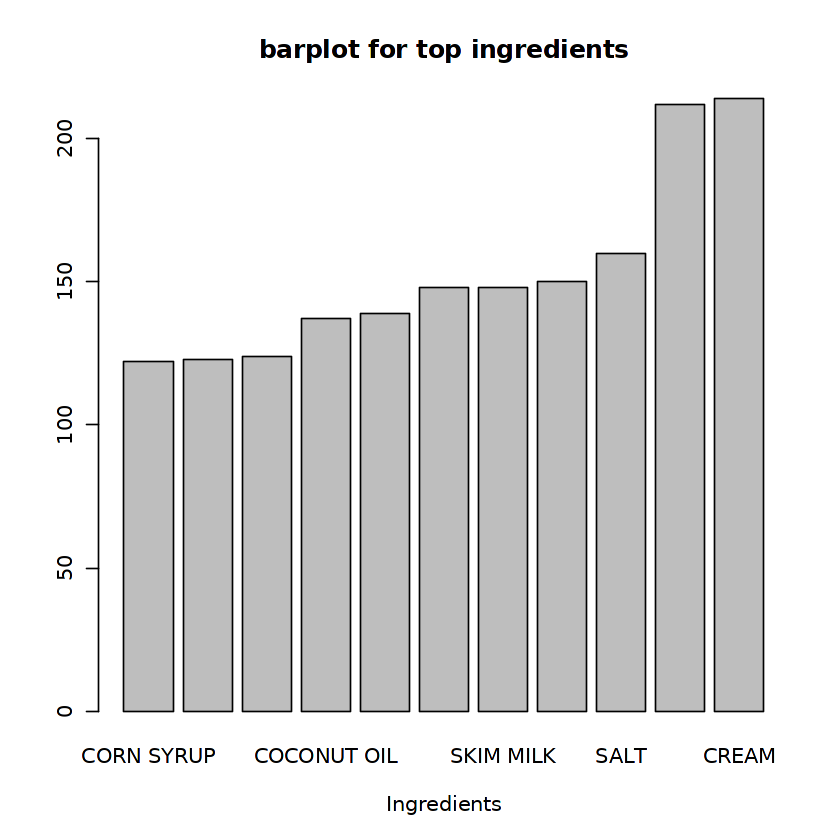

In [37]:
barplot(counts, main ="barplot for top ingredients", xlab="Ingredients")

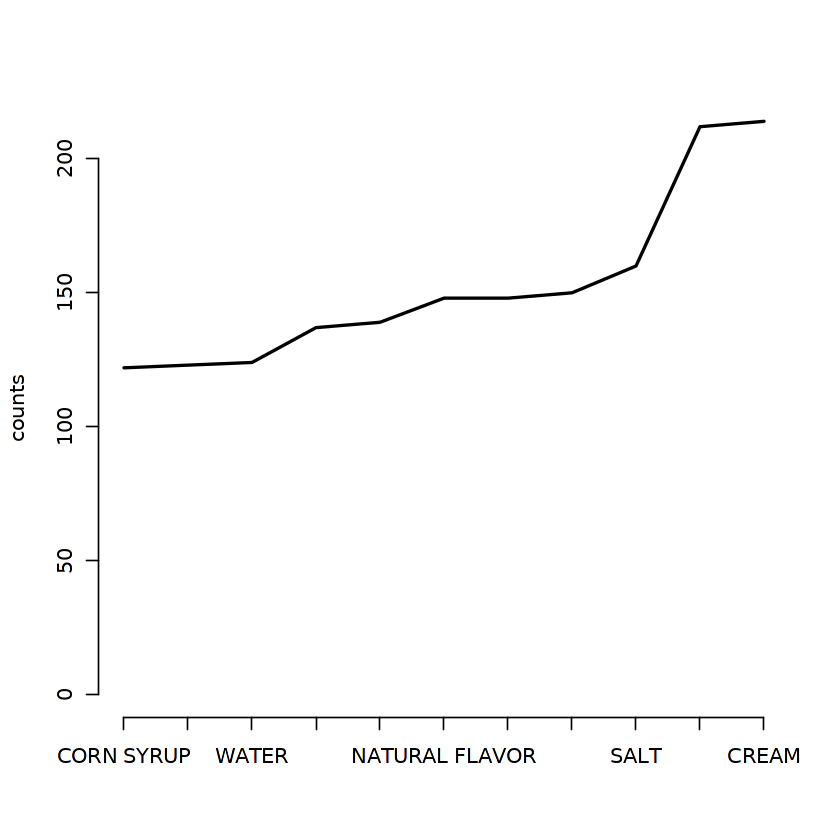

In [39]:
plot(counts, type="l")

From this graph we can see that cream as well as salt are at the top of the list. We also see a jump from salt to sugar of about 50 counts. Which is a big difference when taking into account the differnce of all the top ten.

## Question 2

In [45]:
products_reviews_by_rating <- function(products_df, reviews_df, myrating) #names the function as well as the inputs
    { 
    merge_results <- merge(products_df, reviews_df, by="key") #merges the inputs into a key
    products_reviews_results <- merge_results[merge_results$rating >= myrating, ] #
    return(products_reviews_results)
    }

## Question 3

In [46]:
# Define a function that filters products and reviews based on a rating threshold
products_reviews_by_rating <- function(products_df, reviews_df, myrating) 
{ 
    # Merge the product and review data frames based on a common column "key"
    merge_results <- merge(products_df, reviews_df, by="key")
    
    # Filter the merged data to retain rows with a rating greater than or equal to the specified "myrating"
    products_reviews_results <- merge_results[merge_results$rating >= myrating, ] 
    
    # Return the filtered results
    return(products_reviews_results)
}


## Question 4

In [47]:
my_selection <- products_reviews_by_rating(products, reviews, 4.5)

In [49]:
nrow(my_selection)

[1] 10293

Markdown notes and sentences and analysis written here.

## Question 5

In [82]:
getcount <- function(products_df, ingredient) {
    all_ingredients <- table(trimws(unlist(sapply(products_df$ingredients,getingredients), use.names=FALSE)))
    count <- all_ingredients[ingredient]
    return(count)
    }
    

In [83]:
getcount(products, "SALT")

SALT 
 160 

Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.